### 1. Conozca al Dr. Ignaz Semmelweis

Este es el Dr. Ignaz Semmelweis, médico húngaro nacido en 1818 y activo en el Hospital General de Viena. Si el Dr. Semmelweis parece preocupado, es probable que esté pensando en la fiebre puerperal: una enfermedad mortal que afecta a las mujeres que acaban de dar a luz. Está pensando en ello porque a principios de la década de 1840 en el Hospital General de Viena hasta el 10% de las mujeres que daban a luz morían a causa de ella. Está pensando en ello porque conoce la causa de la fiebre puerperal: son las manos contaminadas de los médicos que dan a luz a los bebés. ¡Y no lo escucharán ni se lavarán las manos!

En este cuaderno, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia de lavarse las manos. Comencemos mirando los datos que hicieron que Semmelweis se diera cuenta de que algo andaba mal con los procedimientos en el Hospital General de Viena.

In [5]:
# Importing modules
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("C:/Users/jorge/Desktop/proyecto python/yearly_deaths_by_clinic.csv")

# Print out yearly
# ... YOUR CODE FOR TASK 1 ...
print(yearly.head(20))

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


### 2. El alarmante número de muertes
La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Notarás que dar a luz era muy peligroso; un número alarmante de mujeres moría como consecuencia del parto, la mayoría de ellas por fiebre puerperal.

Vemos esto más claramente si observamos la proporción de muertes sobre el número de mujeres que dan a luz. Acerquémonos a la proporción de muertes en la Clínica 1.

In [7]:
# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 2 ...
yearly["proportion_deaths"] = yearly["deaths"]/yearly["births"]
# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out clinic_1
# ... YOUR CODE FOR TASK 2 ...

### 3. Muerte en las clínicas
Si ahora graficamos la proporción de muertes tanto en la Clínica 1 como en la Clínica 2, veremos un patrón curioso...

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

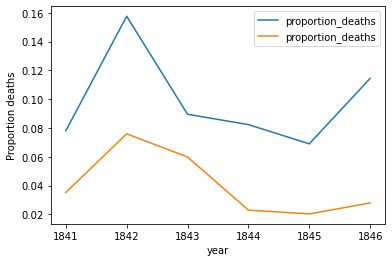

In [9]:
# Importar matplotlib
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x='year',y='proportion_deaths',label="proportion_deaths")
ax.set_ylabel("Proportion deaths")
clinic_2.plot(x="year", y="proportion_deaths",
         label="proportion_deaths", ax=ax)

### 4. Comienza el lavado de manos¶
¿Por qué la proporción de muertes es consistentemente mucho más alta en la Clínica 1? Semmelweis vio el mismo patrón y estaba desconcertado y angustiado. La única diferencia entre las clínicas era que muchos estudiantes de medicina trabajaban en la Clínica 1, mientras que la mayoría de las estudiantes de partería trabajaban en la Clínica 2. Si bien las parteras solo atendían a las mujeres que daban a luz, los estudiantes de medicina también pasaban tiempo en las salas de autopsias examinando cadáveres.

Semmelweis comenzó a sospechar que algo en los cadáveres se extendió de las manos de los estudiantes de medicina y causó fiebre puerperal. Entonces, en un intento desesperado por detener las altas tasas de mortalidad, decretó: ¡Lávense las manos! Esta fue una solicitud poco ortodoxa y controvertida, nadie en Viena sabía acerca de las bacterias en este momento.

Carguemos los datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.

In [14]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("C:/Users/jorge/Desktop/proyecto python/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"]/monthly["births"] 
# ... YOUR CODE FOR TASK 4 ...

# Print out the first rows in monthly
monthly.head()
# ... YOUR CODE FOR TASK 4 ...

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


### 5. El efecto del lavado de manos
Con los datos cargados, ahora podemos ver la proporción de muertes a lo largo del tiempo. En el diagrama a continuación, no hemos marcado dónde comenzó el lavado de manos obligatorio, ¡pero redujo la proporción de muertes a tal grado que debería poder detectarlo!

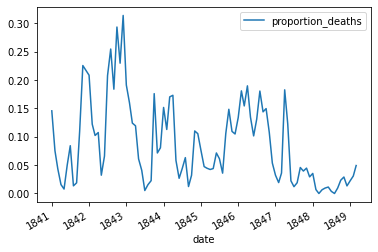

In [15]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y = "proportion_deaths", )
# ... YOUR CODE FOR TASK 5 ...

### 6. El efecto del lavado de manos resaltado
A partir del verano de 1847 la proporción de muertes se reduce drásticamente y, sí, fue entonces cuando Semmelweis hizo obligatorio el lavado de manos.

El efecto del lavado de manos se hace aún más claro si lo destacamos en el gráfico.

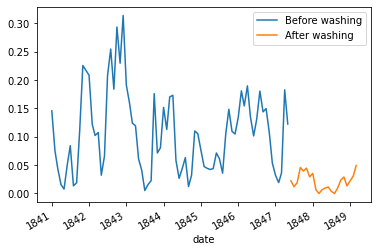

In [16]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x = "date", y = "proportion_deaths", label = "Before washing")
ax = after_washing.plot(x = "date", y = "proportion_deaths", label = "After washing", ax=ax)
# ... YOUR CODE FOR TASK 6 ...

### 7. ¿Más lavado de manos, menos muertes?
Una vez más, el gráfico muestra que el lavado de manos tuvo un gran efecto. ¿Cuánto redujo en promedio la proporción mensual de muertes?

In [17]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean() 
mean_diff

-0.0839566075118334

### 8. Un análisis Bootstrap de los datos de lavado de manos de Semmelweis¶
¡Redujo la proporción de muertes en alrededor de 8 puntos porcentuales! Del 10% en promedio a solo el 2% (que sigue siendo un número alto para los estándares modernos).

Para tener una idea de la incertidumbre sobre cuánto se reduce la mortalidad por lavarse las manos, podríamos observar un intervalo de confianza (aquí calculado usando el método de arranque).

In [18]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.102107
0.975   -0.067886
dtype: float64

### 9. El destino del Dr. Semmelweis¶
Así que lavarse las manos redujo la proporción de muertes entre 6,7 y 10 puntos porcentuales, según un intervalo de confianza del 95%. Con todo, parecería que Semmelweis tenía evidencia sólida de que lavarse las manos era un procedimiento simple pero altamente efectivo que podría salvar muchas vidas.

La tragedia es que, a pesar de la evidencia, la teoría de Semmelweis —que la fiebre puerperal fue causada por alguna "sustancia" (lo que hoy conocemos como bacterias) de los cadáveres de la sala de autopsias— fue ridiculizada por los científicos contemporáneos. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar el Hospital General de Viena para siempre.

Una de las razones de esto fue que las estadísticas y los argumentos estadísticos eran poco comunes en la ciencia médica en el siglo XIX. Semmelweis solo publicó sus datos como largas tablas de datos sin procesar, pero no mostró gráficos ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de hacer, podría haber tenido más éxito en lograr que los médicos vieneses se lavaran las manos.

In [19]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True